# "InjuryRecord.csv" File Uploading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import zipfile
from google.colab import files

In [ ]:


# Browse local machine to upload appropriate ML project csv file
# (NOTE: run secion, scroll down to right beneath this code section, select
#  "Choose File" and upload 'InjuryRecord.csv')

uploaded = files.upload()
injury_file = 'InjuryRecord.csv'

# load df
injury_data = pd.read_csv(injury_file)

print(injury_data)

Saving InjuryRecord.csv to InjuryRecord.csv
     PlayerKey    GameID     PlayKey BodyPart    Surface  DM_M1  DM_M7  \
0        39873   39873-4  39873-4-32     Knee  Synthetic      1      1   
1        46074   46074-7  46074-7-26     Knee    Natural      1      1   
2        36557   36557-1  36557-1-70    Ankle  Synthetic      1      1   
3        46646   46646-3  46646-3-30    Ankle    Natural      1      0   
4        43532   43532-5  43532-5-69    Ankle  Synthetic      1      1   
..         ...       ...         ...      ...        ...    ...    ...   
100      44423  44423-13         NaN     Knee  Synthetic      1      0   
101      31933  31933-20         NaN     Knee  Synthetic      1      0   
102      47285   47285-4         NaN     Knee    Natural      1      1   
103      37068  37068-19         NaN     Knee    Natural      1      1   
104      36696  36696-24         NaN     Knee  Synthetic      1      1   

     DM_M28  DM_M42  
0         1       1  
1         0       0  
2

# Plotting bar graphs for Number of Each Injury Type and Number of Injuries per Field Type
(general initial graphs, following sections are more in-depth stuff)

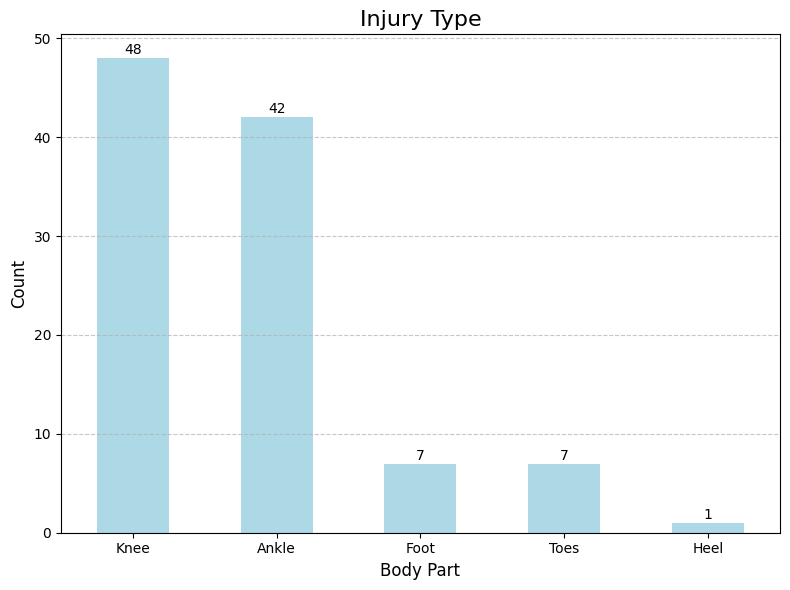

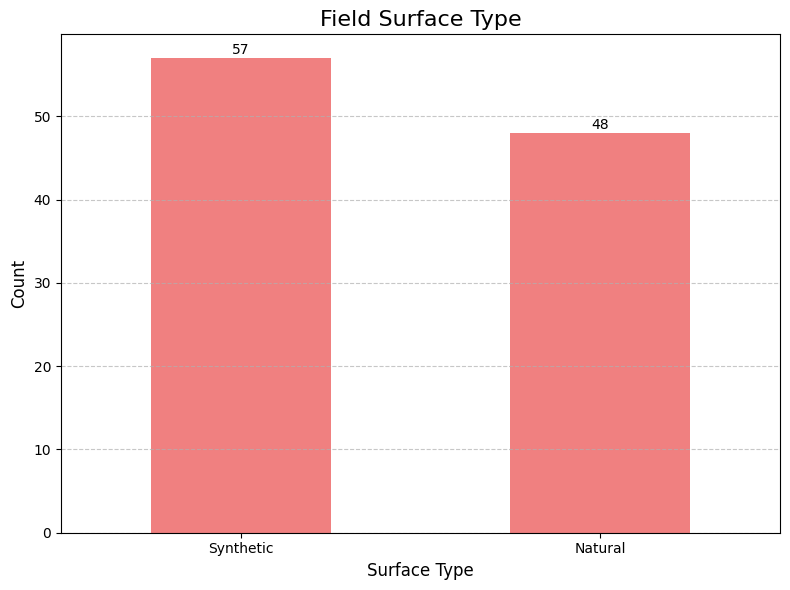

In [ ]:
# --------- BAR GRAPH FOR # OF EACH BODY PART INJURY

# Plotting
bodypart_counts = injury_data['BodyPart'].value_counts()
plt.figure(figsize=(8, 6))
bars = bodypart_counts.plot(kind='bar', color=['lightblue'])
plt.title('Injury Type', fontsize=16)
plt.xlabel('Body Part', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations above each bar
for i, count in enumerate(bodypart_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# --------- BAR GRAPH FOR # OF INJURIES PER SURFACE TYPE

# Plotting
surface_counts = injury_data['Surface'].value_counts()
plt.figure(figsize=(8, 6))
bars = surface_counts.plot(kind='bar', color=['lightcoral'])
plt.title('Field Surface Type', fontsize=16)
plt.xlabel('Surface Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations above each bar
for i, count in enumerate(surface_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Bar Graphs for Injury Severity - days missed per injury type (4 categories of days missed)
(general processing, could use later to discuss factors that lead to injury severity based on injury type)

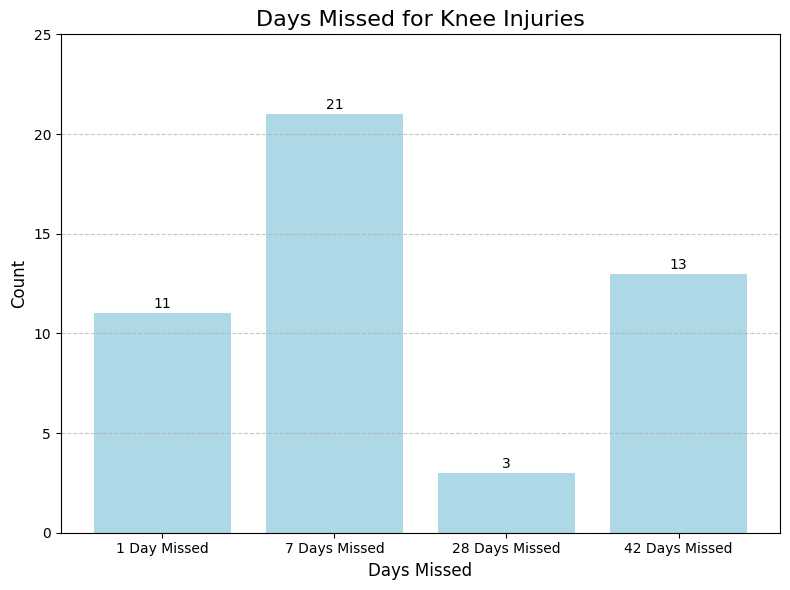

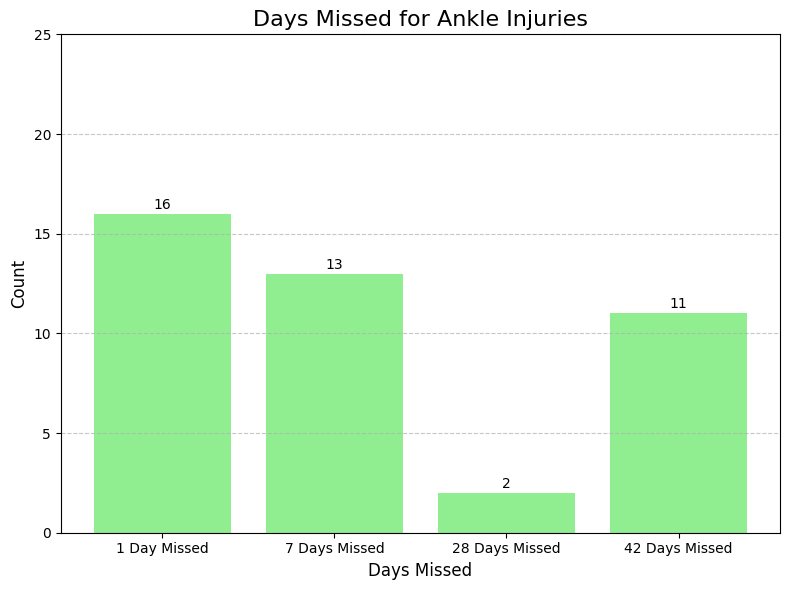

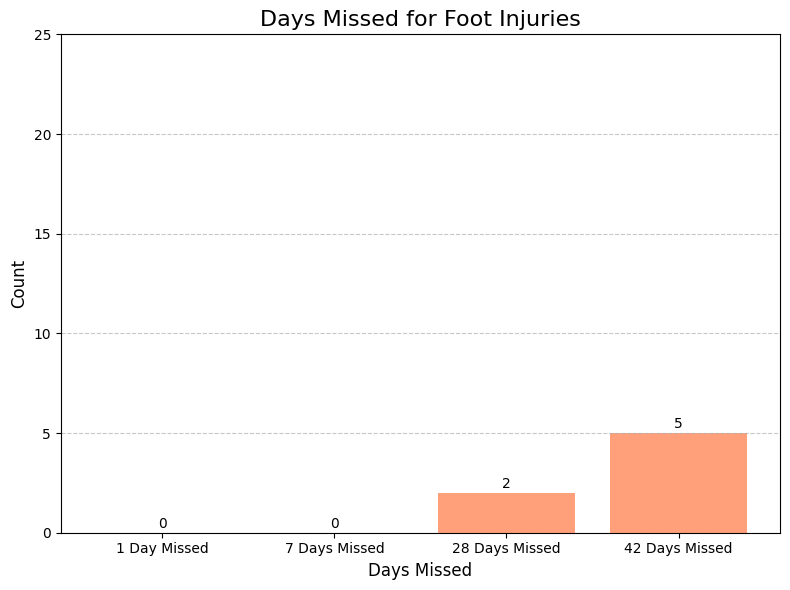

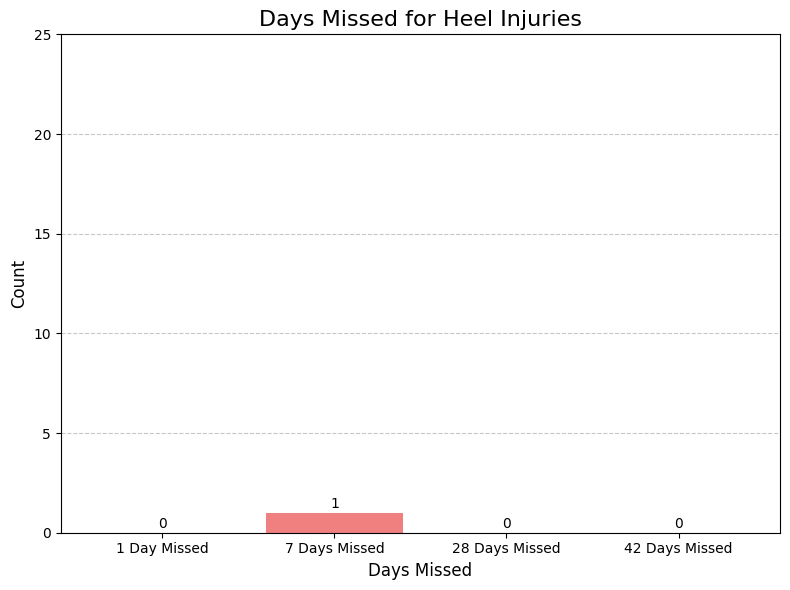

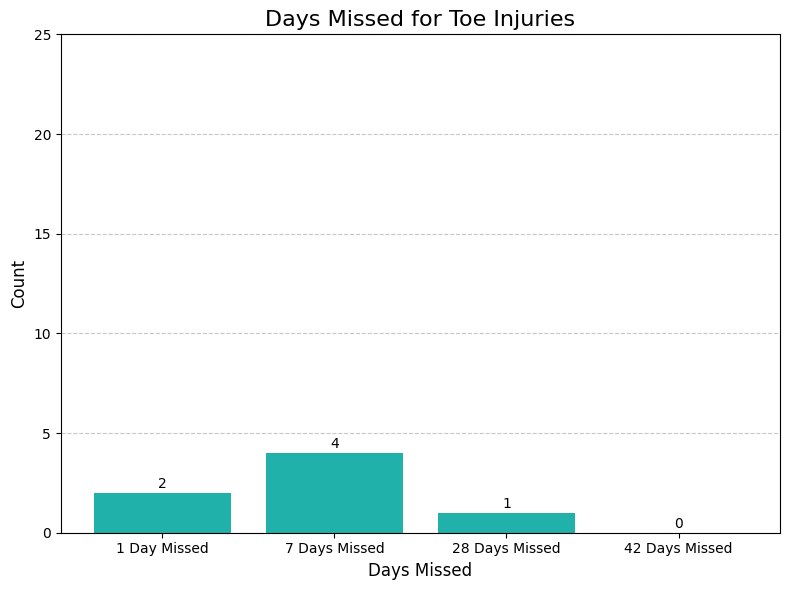

In [ ]:
# ----------- INJURIES SEPARATED OUT BY TYPE: DAYS MISSED

# Make df subsets according to injury
knee = injury_data[injury_data['BodyPart'] == 'Knee']
ankle = injury_data[injury_data['BodyPart'] == 'Ankle']
foot = injury_data[injury_data['BodyPart'] == 'Foot']
toes = injury_data[injury_data['BodyPart'] == 'Toes']
heel = injury_data[injury_data['BodyPart'] == 'Heel']

# NOTE: the way the csv file is set up, injuries that missed 42 days (aka, have
# 1s in that column) also have 1s in the missed 1 day, 7 days, and 28 days column.
# So to figure out each appropriate number I only calculated the amount of 1s per
# column that have 0s in the following column

# ----- KNEE -----
missed_1 = ((knee['DM_M1'] == 1) & (knee['DM_M7'] == 0)).sum()
missed_7 = ((knee['DM_M7'] == 1) & (knee['DM_M28'] == 0)).sum()
missed_28 = ((knee['DM_M28'] == 1) & (knee['DM_M42'] == 0)).sum()
missed_42 = (knee['DM_M42'] == 1).sum()

knee_data = {'Variable': ['1 Day Missed', '7 Days Missed', '28 Days Missed', '42 Days Missed'],
        'Count': [missed_1, missed_7, missed_28, missed_42]}

knee_plot = pd.DataFrame(knee_data)

# PLOT
plt.figure(figsize=(8, 6))
bars = plt.bar(knee_plot['Variable'], knee_plot['Count'], color=['lightblue'])
plt.title('Days Missed for Knee Injuries', fontsize=16)
plt.xlabel('Days Missed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0, top=25)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ----- ANKLE -----
missed_1 = ((ankle['DM_M1'] == 1) & (ankle['DM_M7'] == 0)).sum()
missed_7 = ((ankle['DM_M7'] == 1) & (ankle['DM_M28'] == 0)).sum()
missed_28 = ((ankle['DM_M28'] == 1) & (ankle['DM_M42'] == 0)).sum()
missed_42 = (ankle['DM_M42'] == 1).sum()

ankle_data = {'Variable': ['1 Day Missed', '7 Days Missed', '28 Days Missed', '42 Days Missed'],
              'Count': [missed_1, missed_7, missed_28, missed_42]}

ankle_plot = pd.DataFrame(ankle_data)

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(ankle_plot['Variable'], ankle_plot['Count'], color=['lightgreen'])
plt.title('Days Missed for Ankle Injuries', fontsize=16)
plt.xlabel('Days Missed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0, top=25)

# Add annotations above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ----- FOOT -----
missed_1 = ((foot['DM_M1'] == 1) & (foot['DM_M7'] == 0)).sum()
missed_7 = ((foot['DM_M7'] == 1) & (foot['DM_M28'] == 0)).sum()
missed_28 = ((foot['DM_M28'] == 1) & (foot['DM_M42'] == 0)).sum()
missed_42 = (foot['DM_M42'] == 1).sum()

foot_data = {'Variable': ['1 Day Missed', '7 Days Missed', '28 Days Missed', '42 Days Missed'],
             'Count': [missed_1, missed_7, missed_28, missed_42]}

foot_plot = pd.DataFrame(foot_data)

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(foot_plot['Variable'], foot_plot['Count'], color=['lightsalmon'])
plt.title('Days Missed for Foot Injuries', fontsize=16)
plt.xlabel('Days Missed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0, top=25)

# Add annotations above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ----- HEEL -----
missed_1 = ((heel['DM_M1'] == 1) & (heel['DM_M7'] == 0)).sum()
missed_7 = ((heel['DM_M7'] == 1) & (heel['DM_M28'] == 0)).sum()
missed_28 = ((heel['DM_M28'] == 1) & (heel['DM_M42'] == 0)).sum()
missed_42 = (heel['DM_M42'] == 1).sum()

heel_data = {'Variable': ['1 Day Missed', '7 Days Missed', '28 Days Missed', '42 Days Missed'],
             'Count': [missed_1, missed_7, missed_28, missed_42]}

heel_plot = pd.DataFrame(heel_data)

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(heel_plot['Variable'], heel_plot['Count'], color=['lightcoral'])
plt.title('Days Missed for Heel Injuries', fontsize=16)
plt.xlabel('Days Missed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0, top=25)

# Add annotations above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ----- TOES -----
missed_1 = ((toes['DM_M1'] == 1) & (toes['DM_M7'] == 0)).sum()
missed_7 = ((toes['DM_M7'] == 1) & (toes['DM_M28'] == 0)).sum()
missed_28 = ((toes['DM_M28'] == 1) & (toes['DM_M42'] == 0)).sum()
missed_42 = (toes['DM_M42'] == 1).sum()

toes_data = {'Variable': ['1 Day Missed', '7 Days Missed', '28 Days Missed', '42 Days Missed'],
             'Count': [missed_1, missed_7, missed_28, missed_42]}

toes_plot = pd.DataFrame(toes_data)

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(toes_plot['Variable'], toes_plot['Count'], color=['lightseagreen'])
plt.title('Days Missed for Toe Injuries', fontsize=16)
plt.xlabel('Days Missed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0, top=25)

# Add annotations above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Bar Graphs for Injury Type Based on Field Surface
(see any preliminary trends about correlation between certain injury types and surface types)

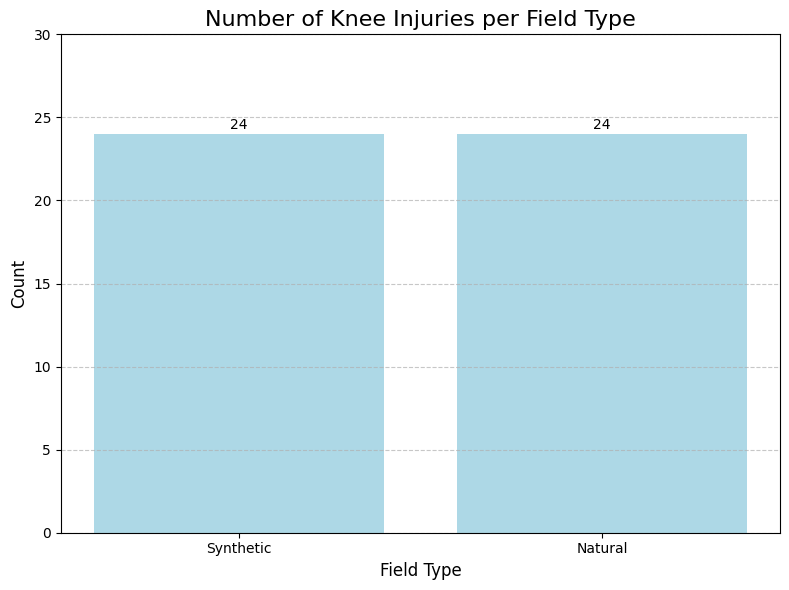

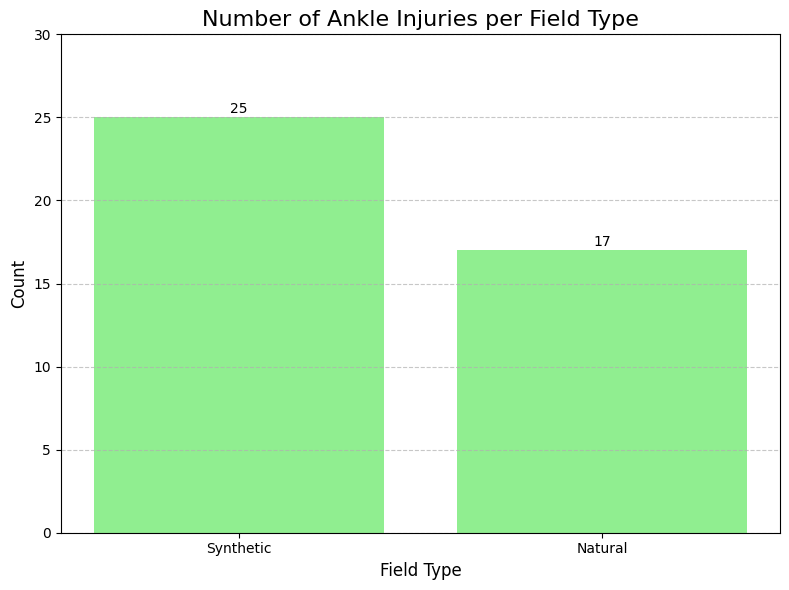

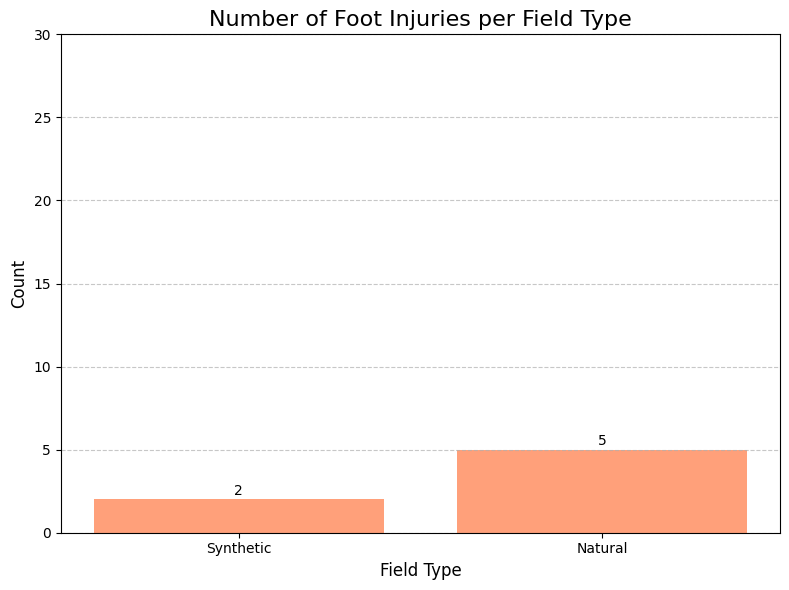

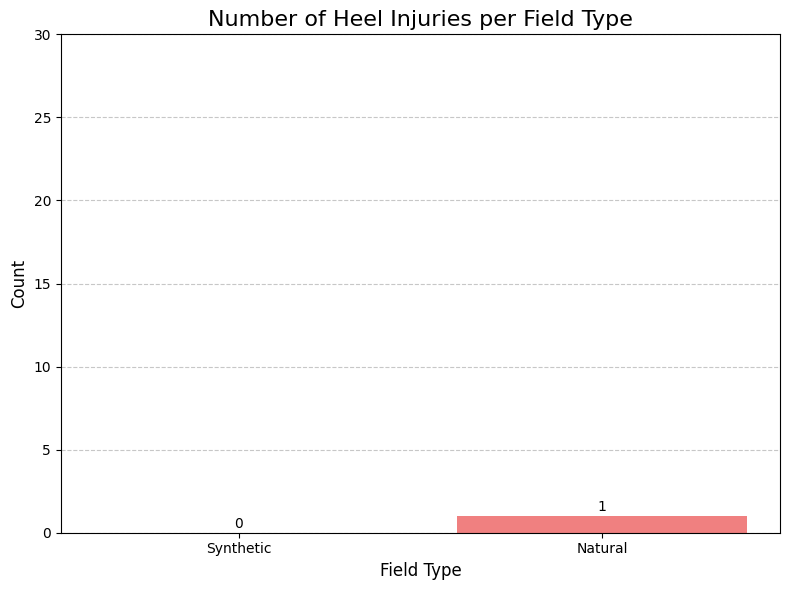

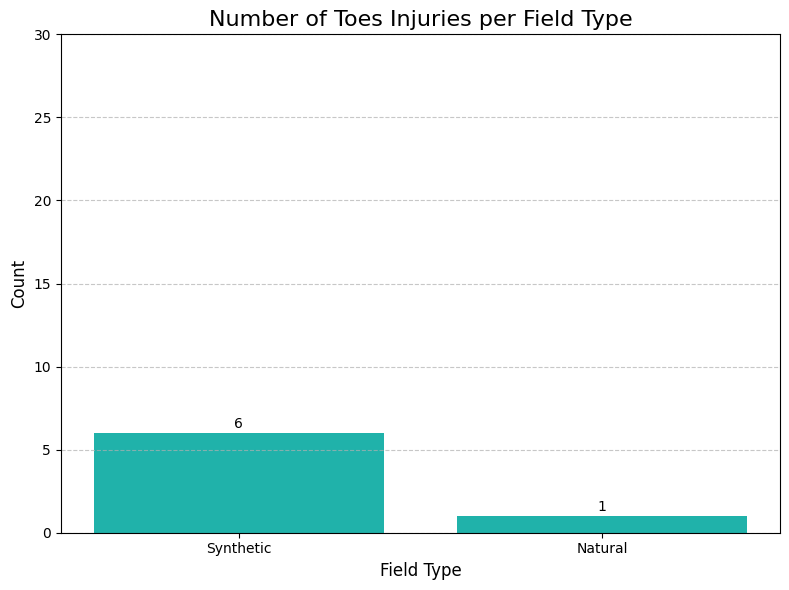

In [ ]:
# ----------- INJURIES SEPARATED OUT BY FIELD TYPE: WHAT TYPES OF INJURIES

# ----- KNEE -----
synthetic = (knee['Surface'] == "Synthetic").sum()
natural = (knee['Surface'] == "Natural").sum()

knee_data = {'Variable': ['Synthetic', 'Natural'],
        'Count': [synthetic, natural]}

knee_plot = pd.DataFrame(knee_data)

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(knee_plot['Variable'], knee_plot['Count'], color=['lightblue'])
plt.title('Number of Knee Injuries per Field Type', fontsize=16)
plt.xlabel('Field Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0, top=30)

# Add annotations above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ----- ANKLE -----
synthetic = (ankle['Surface'] == "Synthetic").sum()
natural = (ankle['Surface'] == "Natural").sum()

ankle_data = {'Variable': ['Synthetic', 'Natural'],
              'Count': [synthetic, natural]}

ankle_plot = pd.DataFrame(ankle_data)

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(ankle_plot['Variable'], ankle_plot['Count'], color=['lightgreen'])
plt.title('Number of Ankle Injuries per Field Type', fontsize=16)
plt.xlabel('Field Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0, top=30)

# Add annotations above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ----- FOOT -----
synthetic = (foot['Surface'] == "Synthetic").sum()
natural = (foot['Surface'] == "Natural").sum()

foot_data = {'Variable': ['Synthetic', 'Natural'],
             'Count': [synthetic, natural]}

foot_plot = pd.DataFrame(foot_data)

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(foot_plot['Variable'], foot_plot['Count'], color=['lightsalmon'])
plt.title('Number of Foot Injuries per Field Type', fontsize=16)
plt.xlabel('Field Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0, top=30)

# Add annotations above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ----- HEEL -----
synthetic = (heel['Surface'] == "Synthetic").sum()
natural = (heel['Surface'] == "Natural").sum()

heel_data = {'Variable': ['Synthetic', 'Natural'],
             'Count': [synthetic, natural]}

heel_plot = pd.DataFrame(heel_data)

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(heel_plot['Variable'], heel_plot['Count'], color=['lightcoral'])
plt.title('Number of Heel Injuries per Field Type', fontsize=16)
plt.xlabel('Field Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0, top=30)

# Add annotations above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ----- TOES -----
synthetic = (toes['Surface'] == "Synthetic").sum()
natural = (toes['Surface'] == "Natural").sum()

toes_data = {'Variable': ['Synthetic', 'Natural'],
             'Count': [synthetic, natural]}

toes_plot = pd.DataFrame(toes_data)

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(toes_plot['Variable'], toes_plot['Count'], color=['lightseagreen'])
plt.title('Number of Toes Injuries per Field Type', fontsize=16)
plt.xlabel('Field Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0, top=30)

# Add annotations above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# "PlayList.csv" File Uploading

In [ ]:
# NOTE: takes ~2 min

# Browse local machine to upload appropriate hwk1.pkl file
# (NOTE: run secion, scroll down to right beneath this code section, select
#  "Choose File" and upload 'InjuryRecord.csv')
uploaded = files.upload()
play_file = 'PlayList.csv'

# load df
play_data = pd.read_csv(play_file)

print(play_data)

# CrossReferencing Datasets
Creating subset of PlayList.csv containing only injured players' plays

In [ ]:
# Get subset dataframe of only injured players' plays
play_data_subset = play_data[play_data['PlayerKey'].isin(injury_data['PlayerKey'])]
print(play_data_subset)

# Eliminate duplicates - not looking for play chronology atm; want position of each injured player
play_data_subset = play_data_subset.drop_duplicates(subset=['PlayerKey'])
print(play_data_subset)

# Get positions of those 100 injured players
pos_counts = play_data_subset['Position'].value_counts()
plt.figure(figsize=(8, 6))
bars = pos_counts.plot(kind='bar', color=['lightseagreen'])
plt.title('Injuries per Position', fontsize=16)
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations above each bar
for i, count in enumerate(pos_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Cross-Referencing Datasets
(Creating Heat Map and Stacked Bar Graph of number of injuries per body part per position)

In [ ]:
# Create merged dataframe of relevant data
merge_df = pd.merge(injury_data, play_data_subset, on='PlayerKey')

# Create a pivot table to count injuries for each combo of Position and BodyPart
pivot_table = merge_df.pivot_table(index='Position', columns='BodyPart', aggfunc='size', fill_value=0)

print("Pivot Table:")
print(pivot_table)

# HEATMAP
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')

plt.xlabel('Injury Type')
plt.ylabel('Player Position')
plt.title('Number of Injuries per Player Position per Injury Type')

plt.show()

# STACKED BAR GRAPH
ax = pivot_table.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

ax.set_xlabel('Player Position')
ax.set_ylabel('Number of Injuries')
ax.set_title('Number of Injuries per Player Position per Injury Type')

plt.show()

# PlayerTrackData.csv File Uploading

In [ ]:
# Browse local machine to upload appropriate hwk1.pkl file
# (NOTE: run secion, scroll down to right beneath this code section, select
#  "Choose File" and upload 'InjuryRecord.csv')
uploaded = files.upload()
player_file = 'PlayerTrackData.csv'
# load df
player_data = pd.read_csv(player_file)

# Upload the zip file
#uploaded = files.upload()

# Extract the contents of the zip file
#zip_filename = list(uploaded.keys())[0]
#with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
 #   zip_ref.extractall()

# Specify the name of the CSV file inside the zip file
#csv_filename = 'PlayerTrackData.csv'

# Load the CSV file into a DataFrame
#player_data = pd.read_csv(csv_filename)


In [ ]:
import pandas as pd
import datetime as DT
import io
import numpy as np

from google.colab import files

# Upload the zip file containing the CSV to Google Colab
uploaded = files.upload()

# Extract the contents of the uploaded zip file
import zipfile
import os

for fn in uploaded.keys():
    with zipfile.ZipFile(fn, 'r') as zip_ref:
        zip_ref.extractall('PlayerTrackData.csv')  # Change 'data_folder' to the desired folder name

# Now you can access the extracted CSV file(s) in the 'data_folder' directory
# Example usage:
df = pd.read_csv('PlayerTrackData.csv')


# Cross Referencing Data

# Logistic Regression (Parker)

In [ ]:
# Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN # SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # 'default'

In [ ]:
# Read CSV files as dataframes
injuries_df = pd.read_csv('InjuryRecord.csv')
players_df = pd.read_csv('PlayerTrackData.csv')
plays_df = pd.read_csv('PlayList.csv')

In [ ]:
# Create injury plays dataframe
inj_plays_df = plays_df.copy()
inj_plays_df['INJ'] = [key in list(injuries_df['PlayKey']) for key in inj_plays_df['PlayKey']]

In [ ]:
# Categorical encoding views
categoricals = ['RosterPosition','StadiumType','FieldType','Weather','PlayType','Position','PositionGroup']
categoricals_map = {c:[] for c in categoricals}

# DATA CORRECTION

# STADIUM TYPE
INDOOR = ['Closed Dome', 'Dome', 'Dome, closed', 'Domed', 'Domed, closed', 'Indoor', 'Indoor, Roof Closed',
          'Indoors', 'Retr. Roof - Closed', 'Retr. Roof Closed', 'Retr. Roof-Closed']
OUTDOOR = ['Bowl', 'Cloudy', 'Domed, Open', 'Domed, open', 'Heinz Field', 'Indoor, Open Roof', 'Open',
           'Oudoor', 'Ourdoor', 'Outddors', 'Outdoor', 'Outdoor Retr Roof-Open', 'Outdoors', 'Outdor',
           'Outside', 'Retr. Roof - Open', 'Retr. Roof-Open', 'Retractable Roof']
inj_plays_df['StadiumType'] = ['Indoor' if k in INDOOR
                               else 'Outdoor' if k in OUTDOOR
                               else 'NAN' for k in inj_plays_df['StadiumType']]
inj_plays_df = inj_plays_df[inj_plays_df['StadiumType'] != 'NAN']

# WEATHER
CLEAR = ['Clear','Clear Skies','Clear and Cool','Clear and Sunny','Clear and cold','Clear and sunny',
         'Clear and warm', 'Clear skies', 'Clear to Partly Cloudy', 'Cold', 'Fair', 'Heat Index 95',
         'Mostly Sunny', 'Mostly Sunny Skies', 'Mostly sunny', 'Partly Sunny', 'Partly clear',
         'Partly sunny', 'Sun & clouds', 'Sunny', 'Sunny Skies', 'Sunny and clear', 'Sunny and cold',
         'Sunny and warm', 'Sunny, Windy', 'Sunny, highs to upper 80s']
RAIN = ['10% Chance of Rain', '30% Chance of Rain', 'Showers',
        'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
        'Cloudy, 50% change of rain', 'Cloudy, Rain', 'Cloudy, chance of rain', 'Light Rain', 'Rain',
        'Rain Chance 40%', 'Rain likely, temps in low 40s.', 'Rain shower', 'Rainy', 'Scattered Showers']
CLOUDS = ['Cloudy', 'Cloudy and Cool', 'Cloudy and cold', 'Cloudy, fog started developing in 2nd quarter',
          'Coudy', 'Hazy', 'Mostly Cloudy', 'Mostly Coudy', 'Mostly cloudy', 'Overcast', 'Partly Cloudy',
          'Partly Clouidy', 'Partly cloudy', 'Party Cloudy', 'cloudy']
SNOW = ['Cloudy, light snow accumulating 1-3"', 'Heavy lake effect snow', 'Snow']
INDOORS = ['Controlled Climate', 'Indoor', 'Indoors', 'N/A (Indoors)', 'N/A Indoor']
inj_plays_df['Weather'] = ['Clear' if k in CLEAR
                           else 'Rain' if k in RAIN
                           else 'Clouds' if k in CLOUDS
                           else 'Snow' if k in SNOW
                           else 'Indoor' if k in INDOORS
                           else 'NAN' for k in inj_plays_df['Weather']]
inj_plays_df = inj_plays_df[inj_plays_df['Weather'] != 'NAN']

# PLAY TYPE
PUNT = ['Punt', 'Punt Returned', 'Punt Not Returned']
KICKOFF = ['Kickoff', 'Kickoff Returned', 'Kickoff Not Returned']
inj_plays_df['PlayType'] = ['Punt' if k in PUNT
                            else 'Kickoff' if k in KICKOFF
                            else k for k in inj_plays_df['PlayType']]

# Remaining fields
inj_plays_df = inj_plays_df[inj_plays_df['PlayType'] != '0']
inj_plays_df = inj_plays_df[inj_plays_df['Position'] != 'Missing Data']
inj_plays_df = inj_plays_df[inj_plays_df['PositionGroup'] != 'Missing Data']
inj_plays_df = inj_plays_df[inj_plays_df['PlayerDay'] != np.nan]
inj_plays_df = inj_plays_df[inj_plays_df['PlayerGame'] != np.nan]
inj_plays_df = inj_plays_df[inj_plays_df['PlayerGamePlay'] != np.nan]
inj_plays_df = inj_plays_df[inj_plays_df['Temperature'] != np.nan]

In [ ]:
# Build encodings
for c in categoricals:
    categoricals_map[c] = {n:i for i, n in enumerate(np.unique([str(item) for item in inj_plays_df[c]]))}
    inj_plays_df[c] = [categoricals_map[c][str(n)] for n in inj_plays_df[c]]
    print(categoricals_map[c])

In [ ]:
# Scikit Learn logistic regression model feature selection
feature_cols = ['RosterPosition', 'PlayerDay', 'PlayerGame', 'StadiumType','FieldType','Temperature','Weather','PlayType','PlayerGamePlay','Position','PositionGroup']
X = inj_plays_df[feature_cols]
y = inj_plays_df['INJ']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
print(X_train)

## SMOTE oversampling
#sm = SMOTE(random_state=42)
#X_smote, y_smote = sm.fit_resample(X_train, y_train)

# ADASYN oversampling
ada = ADASYN(random_state=42, sampling_strategy=.7)
X_train, y_train = ada.fit_resample(X, y)

# Random undersampling
rus = RandomUnderSampler(random_state=0, sampling_strategy=.9)
X_train, y_train = rus.fit_resample(X_train, y_train)

# Build and train model
#logreg = LogisticRegression(random_state=16, max_iter=1000000)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(X_train.columns)
print(logreg.coef_)

score = logreg.score(X_test, y_test)
print(f"Score: {score}")

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# calculate roc curves
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.title('LogReg ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc='best')
# show the plot
plt.show()


In [ ]:
# Build confusion matrix and display
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=['No Injury', 'Injury'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Using ADASYN and RUS', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# PCA (Ashley)

In [ ]:
#feature_cols = ['RosterPosition', 'PlayerDay', 'PlayerGame', 'StadiumType','FieldType','Temperature','Weather','PlayType','PlayerGamePlay','Position','PositionGroup']
#X = inj_plays_df[feature_cols]
#y = inj_plays_df['INJ']

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Conduct PCA
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(X_train)

print("Number of retained components:", pca.n_components_)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

#principalDf = pd.DataFrame(data = principalComponents
             #, columns = ['principal component 1', 'principal component 2'])

#finalDf = pd.concat([principalDf, y_train], axis = 1)

#Try LogReg with PCA
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'

logisticRegr = LogisticRegression(solver = 'lbfgs', class_weight='balanced')
logisticRegr.fit(X_train, y_train)
y_pred1 = logisticRegr.predict(X_test)
#y_pred = logisticRegr.predict(X_test[0:10])
score = logisticRegr.score(X_test, y_test)
print(f"Score: {score}")


#y_pred = logisticRegr.predict(X_test[0].reshape(1,-1))

pca1 = PCA(.8)
print("Number of retained components:", pca.n_components_)
pca1.fit(X_train)

X_train1 = pca1.transform(X_train)
X_test1 = pca1.transform(X_test)

logisticRegr1 = LogisticRegression(solver = 'lbfgs', class_weight='balanced')
logisticRegr1.fit(X_train1, y_train)
y_pred2 = logisticRegr1.predict(X_test1)
#y_pred = logisticRegr.predict(X_test[0:10])
score = logisticRegr1.score(X_test1, y_test)
print(f"Score: {score}")

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

ns_probs = [0 for _ in range(len(y_test))]

precision1, recall1, thresholds = precision_recall_curve(y_test, y_pred1)

plt.plot(recall, precision, label='Log Reg')
plt.plot(recall1, precision1, label='PCA')
plt.plot(recall1, precision1, label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# calculate roc curves
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
pca_fpr, pca_tpr, _ = roc_curve(y_test, y_pred1)
pca1_fpr, pca1_tpr, _ = roc_curve(y_test, y_pred2)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(pca_fpr, pca_tpr, marker='.', label='Logistic + PCA(0.95)')
plt.plot(pca1_fpr, pca1_tpr, marker='.', label='Logistic + PCA(0.8)')
# axis labels
plt.title('PCA ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc='best')
# show the plot
plt.show()

In [ ]:
# Build confusion matrix and display
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=['No Injury', 'Injury'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Using PCA', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')


# RandomForest (Ashley)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#preliminary random forest using oversampling and undersampling
rf = RandomForestClassifier(class_weight='balanced', verbose=2)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, label='RF')
plt.plot(recall1, precision1, label='PCA')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()



# calculate roc curves
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RF')
plt.plot(pca_fpr, pca_tpr, marker='.', label='PCA LR')
# axis labels
plt.title('RandomForest ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc='best')
# show the plot
plt.show()

In [ ]:
# Build confusion matrix and display
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=['No Injury', 'Injury'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
# random forest oversampling/undersampling
# ADASYN oversampling
ada = ADASYN(random_state=42, sampling_strategy=0.7)
X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)

# Apply Random undersampling
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.9)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)




In [ ]:
# random forest feature importance



# Gradient Boosting Machine (Veronica)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

def sanitize_feature_names(dataframe):
    sanitized_column_names = ["".join(c if c.isalnum() else "_" for c in str(col)) for col in dataframe.columns]
    dataframe.columns = sanitized_column_names
    return dataframe


# Load the data
injuries_df = pd.read_csv('InjuryRecord.csv')
plays_df = pd.read_csv('PlayList.csv')

# Identify plays where an injury occurred
injured_playkeys = set(injuries_df['PlayKey'])
plays_df['InjuryOccurred'] = plays_df['PlayKey'].apply(lambda x: 1 if x in injured_playkeys else 0)

# Preparing the data
X = plays_df.drop(columns=['PlayerKey', 'GameID', 'PlayKey', 'InjuryOccurred'])  # Feature matrix
y = plays_df['InjuryOccurred']  # Target variable

# Convert categorical variables to type 'category'
categorical_features = ['RosterPosition', 'StadiumType', 'FieldType', 'Weather', 'PlayType', 'Position', 'PositionGroup']
for feature in categorical_features:
    X[feature] = X[feature].astype('category')

# Fill missing values for numerical columns with the median
X.fillna(X.median(numeric_only=True), inplace=True)

# Fill missing values for categorical columns with 'Missing', ensuring 'Missing' is a recognized category
for col in categorical_features:
    X[col] = X[col].cat.add_categories(['Missing']).fillna('Missing')

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# ADASYN oversampling
ada = ADASYN(random_state=42, sampling_strategy=0.7)
X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)

# Apply Random undersampling
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.9)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)

# Sanitize feature names for LightGBM compatibility
X_train_resampled = sanitize_feature_names(X_train_resampled)
X_test = sanitize_feature_names(X_test)

# Initialize and train the LightGBM model with verbose parameter
gbm_model = lgb.LGBMClassifier(random_state=42, objective='binary', verbose=-1) # Use verbose=-1 for warning level
gbm_model.fit(X_train_resampled, y_train_resampled, eval_set=[(X_test, y_test)])

# Predictions and evaluation
y_pred = gbm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = gbm_model.feature_importances_
features = X_train_resampled.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance_df)

# Visualizing feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance with LightGBM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
## AUC ATTEMPT

from sklearn.metrics import roc_auc_score, roc_curve, auc

# AUC/ROC calculation requires probability scores of the positive class (class '1')
y_prob = gbm_model.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC (Area Under Curve):", roc_auc)

# Compute ROC curve and ROC area for plotting
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# calculate roc curves
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.title('LogReg ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc='best')
# show the plot
plt.show()


In [ ]:
# Generate the confusion matrix based on the true labels and predictions
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


TP = conf_matrix[0, 0]  # True Positives
FP = conf_matrix[1, 1]  # False Positives
precision_manual = TP / (TP + FP)
print("Manually Calculated Precision:", precision_manual)


# XGBoost (??)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Identify plays where an injury occurred
injured_playkeys = set(injuries_df['PlayKey'])
plays_df['InjuryOccurred'] = plays_df['PlayKey'].apply(lambda x: 1 if x in injured_playkeys else 0)

# Prepare the data
# One-hot encode categorical variables
X = pd.get_dummies(plays_df.drop(columns=['PlayerKey', 'GameID', 'PlayKey', 'InjuryOccurred']), drop_first=True)
y = plays_df['InjuryOccurred']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance_df)

# Visualizing feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance with XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with XGBoost')
plt.show()


#**MLP (Run Top-to-Bottom)**

#### Dependencies and Dataframe Construction

In [ ]:
# Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import ADASYN # SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # 'default'

In [ ]:
# Read CSV files as dataframes
injuries_df = pd.read_csv('InjuryRecord.csv')
players_df = pd.read_csv('PlayerTrackData.csv')
plays_df = pd.read_csv('PlayList.csv')

# Display dataframes
#for df in [injuries_df, players_df, plays_df]:
    #print(len(df))
    #print(df.columns)
    #print(df)

#### Data Cleaning and Categorical Encodings

In [ ]:
# Create injury plays dataframe
inj_plays_df = plays_df.copy()
inj_plays_df['INJ'] = [key in list(injuries_df['PlayKey']) for key in inj_plays_df['PlayKey']]

In [ ]:
# Categorical encoding fields
categoricals = ['RosterPosition','StadiumType','FieldType','Weather','PlayType','Position','PositionGroup']

# Stadium type data corrections
INDOOR = ['Closed Dome', 'Dome', 'Dome, closed', 'Domed', 'Domed, closed', 'Indoor', 'Indoor, Roof Closed',
          'Indoors', 'Retr. Roof - Closed', 'Retr. Roof Closed', 'Retr. Roof-Closed']
OUTDOOR = ['Bowl', 'Cloudy', 'Domed, Open', 'Domed, open', 'Heinz Field', 'Indoor, Open Roof', 'Open',
           'Oudoor', 'Ourdoor', 'Outddors', 'Outdoor', 'Outdoor Retr Roof-Open', 'Outdoors', 'Outdor',
           'Outside', 'Retr. Roof - Open', 'Retr. Roof-Open', 'Retractable Roof']
inj_plays_df['StadiumType'] = ['Indoor' if k in INDOOR
                               else 'Outdoor' if k in OUTDOOR
                               else 'NAN' for k in inj_plays_df['StadiumType']]
inj_plays_df = inj_plays_df[inj_plays_df['StadiumType'] != 'NAN']

# Weather data corrections
CLEAR = ['Clear','Clear Skies','Clear and Cool','Clear and Sunny','Clear and cold','Clear and sunny',
         'Clear and warm', 'Clear skies', 'Clear to Partly Cloudy', 'Cold', 'Fair', 'Heat Index 95',
         'Mostly Sunny', 'Mostly Sunny Skies', 'Mostly sunny', 'Partly Sunny', 'Partly clear',
         'Partly sunny', 'Sun & clouds', 'Sunny', 'Sunny Skies', 'Sunny and clear', 'Sunny and cold',
         'Sunny and warm', 'Sunny, Windy', 'Sunny, highs to upper 80s']
RAIN = ['10% Chance of Rain', '30% Chance of Rain', 'Showers',
        'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
        'Cloudy, 50% change of rain', 'Cloudy, Rain', 'Cloudy, chance of rain', 'Light Rain', 'Rain',
        'Rain Chance 40%', 'Rain likely, temps in low 40s.', 'Rain shower', 'Rainy', 'Scattered Showers']
CLOUDS = ['Cloudy', 'Cloudy and Cool', 'Cloudy and cold', 'Cloudy, fog started developing in 2nd quarter',
          'Coudy', 'Hazy', 'Mostly Cloudy', 'Mostly Coudy', 'Mostly cloudy', 'Overcast', 'Partly Cloudy',
          'Partly Clouidy', 'Partly cloudy', 'Party Cloudy', 'cloudy']
SNOW = ['Cloudy, light snow accumulating 1-3"', 'Heavy lake effect snow', 'Snow']
INDOORS = ['Controlled Climate', 'Indoor', 'Indoors', 'N/A (Indoors)', 'N/A Indoor']
inj_plays_df['Weather'] = ['Clear' if k in CLEAR
                           else 'Rain' if k in RAIN
                           else 'Clouds' if k in CLOUDS
                           else 'Snow' if k in SNOW
                           else 'Indoor' if k in INDOORS
                           else 'NAN' for k in inj_plays_df['Weather']]
inj_plays_df = inj_plays_df[inj_plays_df['Weather'] != 'NAN']

# Play type data corrections
PUNT = ['Punt', 'Punt Returned', 'Punt Not Returned']
KICKOFF = ['Kickoff', 'Kickoff Returned', 'Kickoff Not Returned']
inj_plays_df['PlayType'] = ['Punt' if k in PUNT
                            else 'Kickoff' if k in KICKOFF
                            else k for k in inj_plays_df['PlayType']]

# Removal of remaining null data
inj_plays_df = inj_plays_df[inj_plays_df['PlayType'] != '0']
inj_plays_df = inj_plays_df[inj_plays_df['Position'] != 'Missing Data']
inj_plays_df = inj_plays_df[inj_plays_df['PositionGroup'] != 'Missing Data']
inj_plays_df = inj_plays_df[inj_plays_df['PlayerDay'] != np.nan]
inj_plays_df = inj_plays_df[inj_plays_df['PlayerGame'] != np.nan]
inj_plays_df = inj_plays_df[inj_plays_df['PlayerGamePlay'] != np.nan]
inj_plays_df = inj_plays_df[inj_plays_df['Temperature'] != np.nan]

In [ ]:
# One-hot encodings
ohe = OneHotEncoder()
for c in categoricals:
    ohe.fit(np.array(inj_plays_df[c]).reshape(-1, 1))
    inj_plays_df[c] = ohe.transform(np.array(inj_plays_df[c]).reshape(-1, 1)).todense()

#### Oversampling, Undersampling, and Train-Test Split

In [ ]:
# Scikit Learn logistic regression model feature selection
feature_cols = ['RosterPosition', 'PlayerDay', 'PlayerGame', 'StadiumType','FieldType','Temperature','Weather','PlayType','PlayerGamePlay','Position','PositionGroup']
X = inj_plays_df[feature_cols]
y = inj_plays_df['INJ']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

## SMOTE oversampling
#sm = SMOTE(random_state=42)
#X_smote, y_smote = sm.fit_resample(X_train, y_train)

# ADASYN oversampling
ada = ADASYN(random_state=42, sampling_strategy=.5)
X_train, y_train = ada.fit_resample(X, y)

# Random undersampling
rus = RandomUnderSampler(random_state=0, sampling_strategy=.7)
X_train, y_train = rus.fit_resample(X_train, y_train)

#### MLP Classifier Fit

In [ ]:
# Create MLP classifier
clf = MLPClassifier(
    activation='relu',
    learning_rate='adaptive',
    solver='adam',
    alpha=0.005,
    hidden_layer_sizes=(25, 15, 9, 4),
    random_state=1
)

# Fit model to data
clf.fit(X_train, y_train)

# Make prediction
y_pred = clf.predict(X_test)

#### Generate Metrics

In [ ]:
# Build confusion matrix and display
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=['No Injury', 'Injury'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('MLP Classifier, Adjusted', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
# Precision-Recall curve and AUC-ROC curve
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
mlp_fpr, mlp_tpr, _ = metrics.roc_curve(y_test, y_pred)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP')

plt.title('Multi-Layer Perceptron ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC-AUC
auc = metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)